<a href="https://colab.research.google.com/github/weathon/Lab-4-Python/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Report: https://docs.google.com/document/d/12JLARgyj2NsJSm6lgNFJ1zVphp1H5KW66jhNY04lGX4/edit?usp=sharing

In [ ]:
from matplotlib import style
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
style.use('ggplot')

In [ ]:
!wget -O OurDetial.data mp3.weasoft.com/OurDetial.data # Forgot to use 4 sig figs 
!wget -O OurWideRange.data  mp3.weasoft.com/OurWideRange.data 
!wget -O OtherDetial.data mp3.weasoft.com/OtherDetial.data
!wget -O OtherWideRange.data mp3.weasoft.com/OtherWideRange.data

In [ ]:
def setText(plot, title, xlab, ylab):
  plot.title(title);plot.xlabel(xlab);plot.ylabel(ylab)

In [ ]:
def readData(filename):
  res = []
  with open(filename, "r") as f:
    con = f.readlines()
  for i in con:
    if i.startswith("#"):
      continue
    row = []
    for j in i.split(","):
      try:
        row.append(float(j))
      except:
        row.append(np.NaN)
        pass
    res.append(row)
  return res

In [ ]:
x1 = np.array(list(range(1,54)))
x1 = np.delete(x1, 24)
x1 = np.delete(x1, 1)

wide1 = readData("OurWideRange.data")
wide1 = np.delete(wide1, 24)
wide1 = np.delete(wide1, 1)

data2 = np.array(readData("OurDetial.data"))
x2 = data2[:,0]
detial1 = data2[:,1]
combindedX = np.append(x1, x2)
combindedY = np.append(wide1, detial1)
indexes = np.argsort(combindedX)
combindedY = combindedY[indexes]
combindedX = combindedX[indexes]

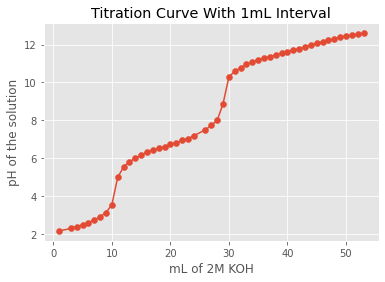

In [ ]:
plot.scatter(x1, wide1)
setText(plot,"Titration Curve With 1mL Interval","mL of 2M KOH","pH of the solution")
plot.plot(x1, wide1)

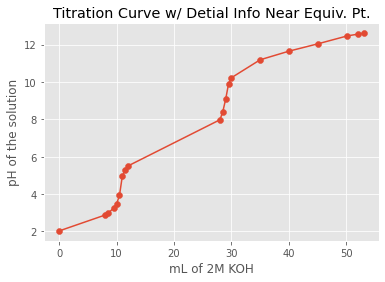

In [20]:
plot.scatter(x2, detial1)
setText(plot,"Titration Curve w/ Detial Info Near Equiv. Pt.","mL of 2M KOH","pH of the solution")
plot.plot(x2, detial1)

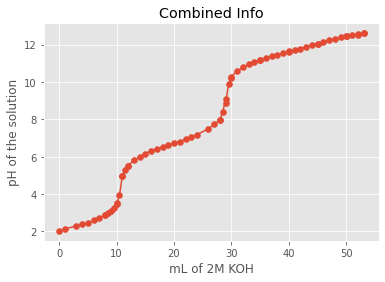

In [ ]:
plot.scatter(combindedX, combindedY)
setText(plot,"Combined Info","mL of 2M KOH","pH of the solution")
plot.plot(combindedX, combindedY)

In [22]:
def takeDerivative(X, Y):
  derivativeX = []
  derivative = []
  for i in range(1,X.shape[0]):
    if (X[i]-X[i-1]) == 0:
      continue
    derivativeX.append((X[i]+X[i-1])/2)
    derivative.append((Y[i]-Y[i-1])/(X[i]-X[i-1]))
  return derivativeX, derivative

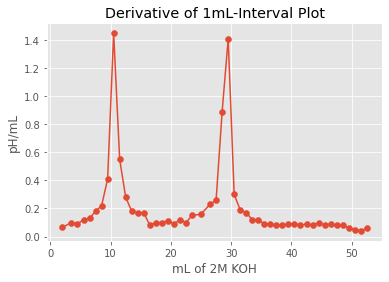

In [54]:
derivativeX, derivative = takeDerivative(x1, wide1)
plot.scatter(derivativeX, derivative)
plot.plot(derivativeX, derivative)
setText(plot,"Derivative of 1mL-Interval Plot","mL of 2M KOH","pH/mL")

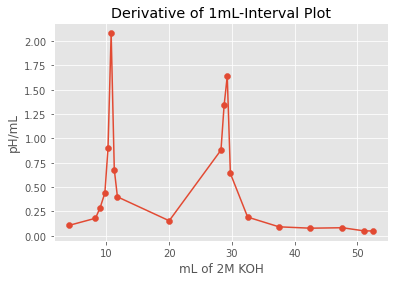

In [71]:
derivativeX, derivative = takeDerivative(x2, detial1)
plot.scatter(derivativeX, derivative)
plot.plot(derivativeX, derivative)
setText(plot,"Derivative of 1mL-Interval Plot","mL of 2M KOH","pH/mL")
# WOW LOOKS LIKE HPLC 

In [73]:
# Find Peak - replace with runs data to run
mid = 9
data = detial1 #wide1
leftHalf = derivative[:mid]
leftHalfpH = data[:mid]
leftHalfX = derivativeX[:mid]
rightHalf = derivative[mid:]
rightHalfX = derivativeX[mid:]
rightHalfpH = data[mid:]

# Missed The Peak Point if It is The peak
ml1 = leftHalfX[np.argmax(leftHalf)]
ml2 = rightHalfX[np.argmax(rightHalf)]
pH1 = (leftHalfpH[np.argmax(leftHalf)]+leftHalfpH[np.argmax(leftHalf)+1])/2
pH2 = (rightHalfpH[np.argmax(rightHalf)]+rightHalfpH[np.argmax(rightHalf)+1])/2
print(f"Peak one: {ml1}mL and pH = {pH1}")
print(f"Peak two: {ml2}mL and pH = {pH2}") # Their shift are the same

Peak one: 10.75mL and pH = 4.45
Peak two: 29.25mL and pH = 9.5


In [76]:
2.47+(2.59-2.47)*0.37

2.5144

In [77]:
6.72+(6.81-6.72)*0.25

6.7425

In [79]:
11.79+(11.88-11.79)*0.125

11.80125

Text(43.125, 11.8, 'Half-Neutralization Points')

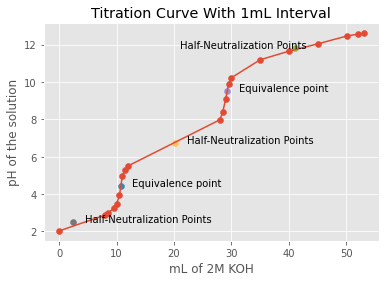

In [80]:
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

plot.scatter(x2, data)
setText(plot,"Titration Curve With 1mL Interval","mL of 2M KOH","pH of the solution")
plot.plot(x2, data)
plot.scatter(ml1, pH1)
plot.text(ml1+2, pH1,'Equivalence point')
plot.scatter(ml2, pH2)
plot.text(ml2+2, pH2,'Equivalence point')
plot.scatter(2.47, 2.51)
plot.text(2.47 +2 , 2.51,'Half-Neutralization Points')
plot.scatter(20.25, 6.742)
plot.text(20.25+2, 6.742,'Half-Neutralization Points')
plot.scatter(41.125, 11.80)
plot.text(41.125+2, 11.80,'Half-Neutralization Points', horizontalalignment='right')

# Shared Data

In [87]:
OD = np.array(readData("OtherDetial.data")[:-1])
OW = np.array(readData("OtherWideRange.data")[:-1])

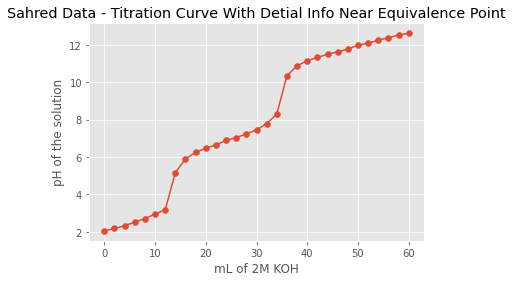

In [88]:
plot.scatter(OW[:,0], OW[:,1])
setText(plot,"Sahred Data - Titration Curve With Detial Info Near Equivalence Point","mL of 2M KOH","pH of the solution")
plot.plot(OW[:,0], OW[:,1])

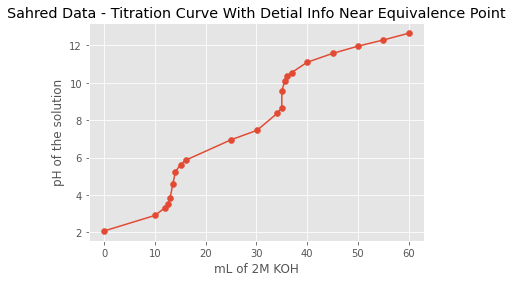

In [89]:
plot.scatter(OD[:,0], OD[:,1])
setText(plot,"Sahred Data - Titration Curve With Detial Info Near Equivalence Point","mL of 2M KOH","pH of the solution")
plot.plot(OD[:,0], OD[:,1])

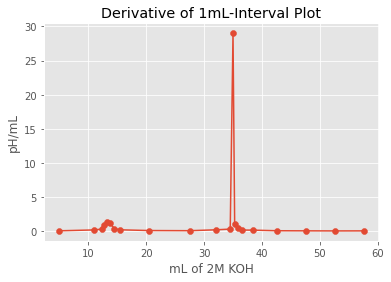

In [100]:
derivativeX, derivative = takeDerivative(OD[:,0], OD[:,1])
plot.scatter(derivativeX, derivative)
plot.plot(derivativeX, derivative)
setText(plot,"Derivative of 1mL-Interval Plot","mL of 2M KOH","pH/mL")

In [99]:
# Find Peak - replace with runs data to run
mid = 12
data = OW[:,1] #wide1
leftHalf = derivative[:mid]
leftHalfpH = data[:mid]
leftHalfX = derivativeX[:mid]
rightHalf = derivative[mid:]
rightHalfX = derivativeX[mid:]
rightHalfpH = data[mid:]

# Missed The Peak Point if It is The peak
ml1 = leftHalfX[np.argmax(leftHalf)]
ml2 = rightHalfX[np.argmax(rightHalf)]
pH1 = (leftHalfpH[np.argmax(leftHalf)]+leftHalfpH[np.argmax(leftHalf)+1])/2
pH2 = (rightHalfpH[np.argmax(rightHalf)]+rightHalfpH[np.argmax(rightHalf)+1])/2
print(f"Peak one: {ml1}mL and pH = {pH1}")
print(f"Peak two: {ml2}mL and pH = {pH2}") # Their shift are the same

Peak one: 13.0mL and pH = 4.175
Peak two: 35.0mL and pH = 9.325


In [101]:
# Find Peak - replace with runs data to run
mid = 10
data = OD[:,1] #wide1
leftHalf = derivative[:mid]
leftHalfpH = data[:mid]
leftHalfX = derivativeX[:mid]
rightHalf = derivative[mid:]
rightHalfX = derivativeX[mid:]
rightHalfpH = data[mid:]

# Missed The Peak Point if It is The peak
ml1 = leftHalfX[np.argmax(leftHalf)]
ml2 = rightHalfX[np.argmax(rightHalf)]
pH1 = (leftHalfpH[np.argmax(leftHalf)]+leftHalfpH[np.argmax(leftHalf)+1])/2
pH2 = (rightHalfpH[np.argmax(rightHalf)]+rightHalfpH[np.argmax(rightHalf)+1])/2
print(f"Peak one: {ml1}mL and pH = {pH1}")
print(f"Peak two: {ml2}mL and pH = {pH2}") # Their shift are the same

Peak one: 13.245000000000001mL and pH = 4.225
Peak two: 34.995mL and pH = 9.105


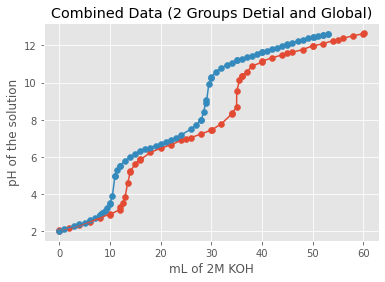

In [84]:
combindedX2 = np.append(OD[:,0], OW[:,0])
combindedY2 = np.append(OD[:,1], OW[:,1])
indexes = np.argsort(combindedX2)
combindedY2 = combindedY2[indexes]
combindedX2 = combindedX2[indexes]
plot.scatter(combindedX2, combindedY2)
plot.scatter(combindedX, combindedY)
setText(plot,"Combined Data (2 Groups Detial and Global)","mL of 2M KOH","pH of the solution")
plot.plot(combindedX2, combindedY2)
plot.plot(combindedX, combindedY)

In [ ]:
!pip3 install pip install tableprint

In [103]:
import tableprint as tp

In [108]:
13.245/2

6.6225

In [ ]:
.1225/2*(5.24-4.59)

In [109]:
print("Shared Data")
tp.table(
   [["pKa1", "{5.50, 4.18}"],
    ["pKa2", "{6.90, 6.89}"],
    ["pKa3", "{11.74, 11.77}"],
    ["Equiv. Pt. pH 1", "{4.175, 4.225}" ],
    ["Equiv. Pt. pH 2", "{9.105, 9.325}"]],style='grid'
)

Shared Data
+---------------+---------------+
|           pKa1|   {5.50, 4.18}|
|           pKa2|   {6.90, 6.89}|
|           pKa3| {11.74, 11.77}|
|Equiv. Pt. pH 1| {4.175, 4.225}|
|Equiv. Pt. pH 2| {9.105, 9.325}|
+---------------+---------------+
